# <center><font color='OrangeRed'>Проверка гипотез и A/B-тест для увеличения выручки интернет-магазина</font></center>

Мною будут проверены гипотезы и проведен A/B-тест для увеличения выручки интернет-магазина.

У меня есть следующие *исходные данные*:
 - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort;
 - файлы с результатами A/B-теста.
 
Исследование будет построено из следующих *этапов*:

1. [Описание предоставленных данных](#obzor)
2. [Приоритезация гипотез](#hyp)
3. [Анализ A/B-теста](#ab)
4. [Вывод по результату исследования](#vyvod)

Результатами данного исследование будут являться информация о гипотезах и выводы по проведенному A/B-тесту.

# <a id="obzor"></a><font style="background-color: Cyan; color=black">1. Описание предоставленных данных</font> #

Файл **hypothesis.csv**:
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка  гипотезы.
 
Файл **orders.csv**:
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
Файл **visitors.csv**:
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# <a id="hyp"></a><font style="background-color: Cyan; color=black">2. Приоритезация гипотез</font> #

Загружаю все необходимые библиотеки. Получаю доступ к файлам.

In [1]:
import random
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 10)})

from datetime import datetime, timedelta
import math
import scipy.stats as stats
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
colors=['green', 'hotpink', 'orangered', 'deepskyblue', 
        'cyan', 'purple', 'gold', 'chocolate', 'dimgrey', 'darkviolet',
       'navy', 'lime', 'coral', 'black']

In [4]:
def check_df(df):
    display(df.head(10))
    print(f'Количество дубликатов в датафрейме: {df.duplicated().sum()}')
    print()
    print('Количество пропущенных значений:')
    display(df.isna().sum())
    print()
    print('Общая информация о датафрейме:')
    display(df.info()) 

In [5]:
check_df(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Количество дубликатов в датафрейме: 0

Количество пропущенных значений:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

In [6]:
check_df(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Количество дубликатов в датафрейме: 0

Количество пропущенных значений:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

In [7]:
check_df(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Количество дубликатов в датафрейме: 0

Количество пропущенных значений:


date        0
group       0
visitors    0
dtype: int64


Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

В датафреймах у столбцов с датами не подходящий тип. Исправляю

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

<font color='blue'>Фреймворк ICE</font>

In [9]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)

In [10]:
#при установлении количества символов без ограничения (None) выдает ошибку
pd.set_option('display.max_colwidth', 1000)
hypothesis.sort_values('ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00


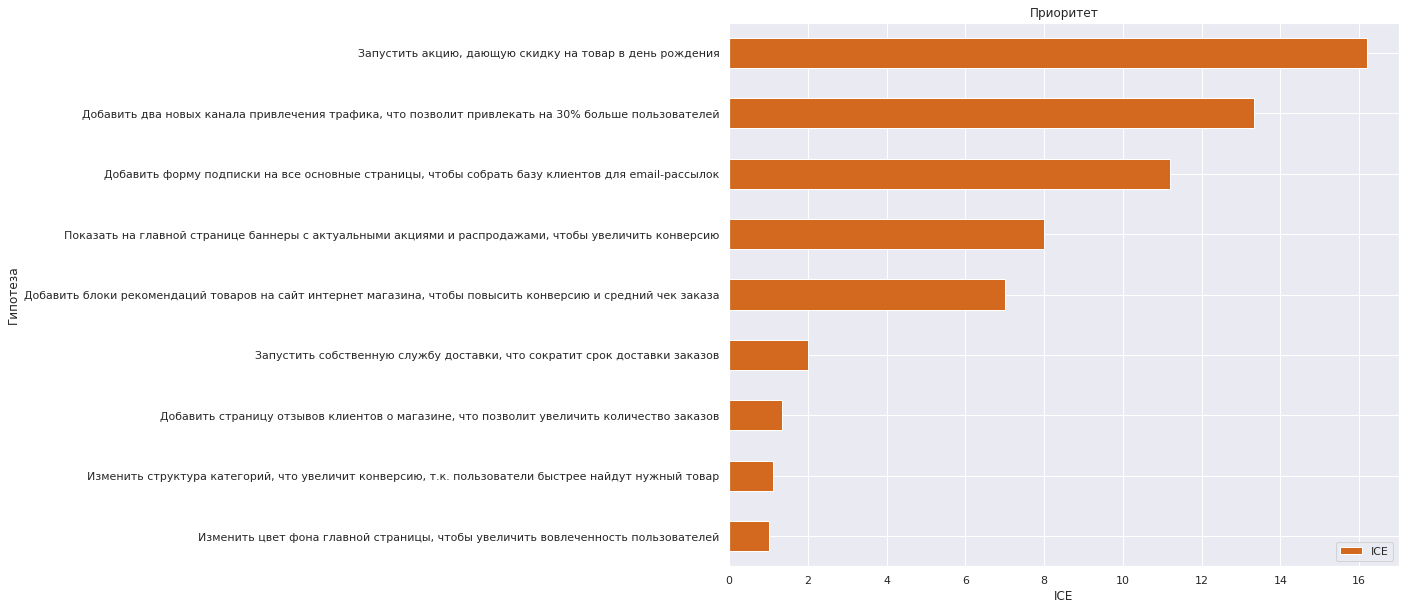

In [11]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh', color=random.choice(colors))
ax.set(title='Приоритет', xlabel='ICE', ylabel='Гипотеза')
plt.show()

**Перспективные гипотезы** - 8, 0, 7, 6

<font color='blue'>Фреймворк RICE</font>

In [12]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)

In [13]:
hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


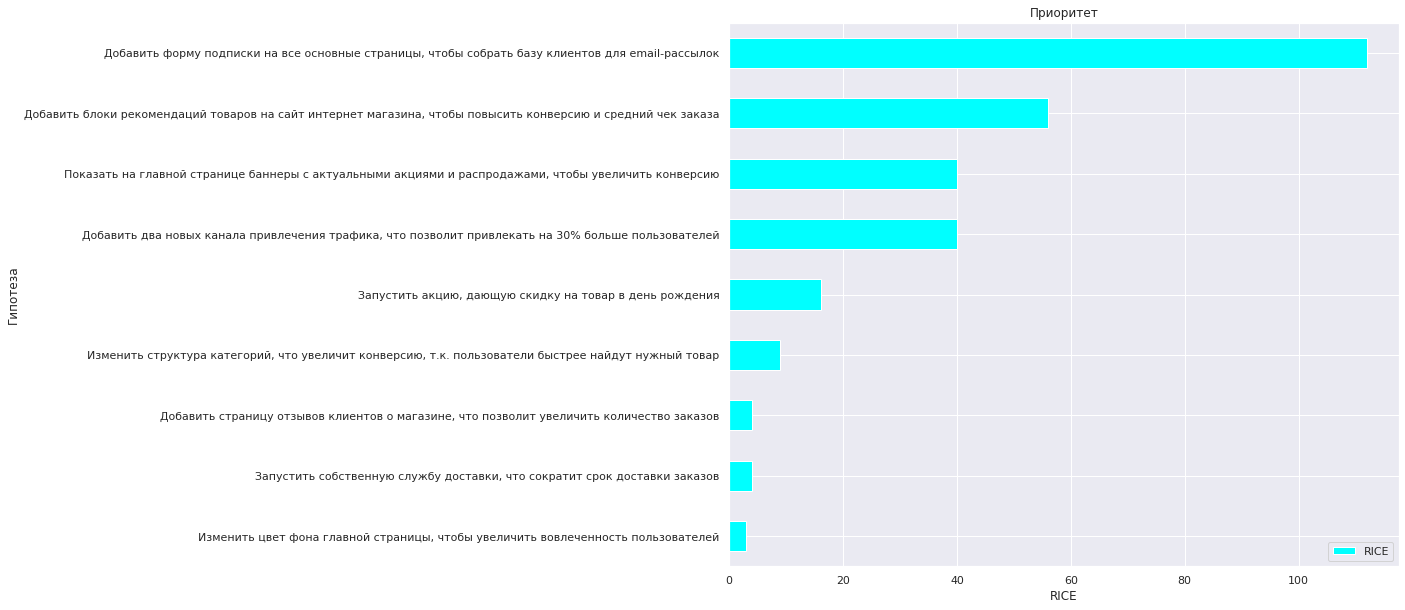

In [14]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh', color=random.choice(colors))
ax.set(title='Приоритет', xlabel='RICE', ylabel='Гипотеза')
plt.show()

**Перспективные гипотезы** - 7, 2, 0, 6

С помочью фреймворка **RICE** на первое место вышла гипотеза *7* - в этом фреймворке у нас добавляется в числитель параметр **Reach** (скольких пользователей затронет изменение, которое вы хотите внести) - у гипотезы 7 он равен 10 (максимальное), а у 8 - 1; у гипотез 0 и 6 - 3 и 5, соответственно.

# <a id="ab"></a><font style="background-color: Cyan; color=black">2. Анализ A/B-теста</font> #

<font color='blue'>График кумулятивной выручки по группам</font>

Создаю датафрейм datesGroups с уникальными парами значений 'date' и 'group' из таблицы orders.

In [15]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head(5)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


*Агрегированные кумулятивные по дням данные о заказах*

In [16]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


*Агрегированные кумулятивные по дням данные о посетителях интернет-магазина*

In [17]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [18]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


*Графики кумулятивной выручки по дням и группам A/B-тестирования:*

Кумулятивное количество заказов и кумулятивная выручка по дням в группе А

In [19]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

Кумулятивное количество заказов и кумулятивная выручка по дням в группе B

In [20]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

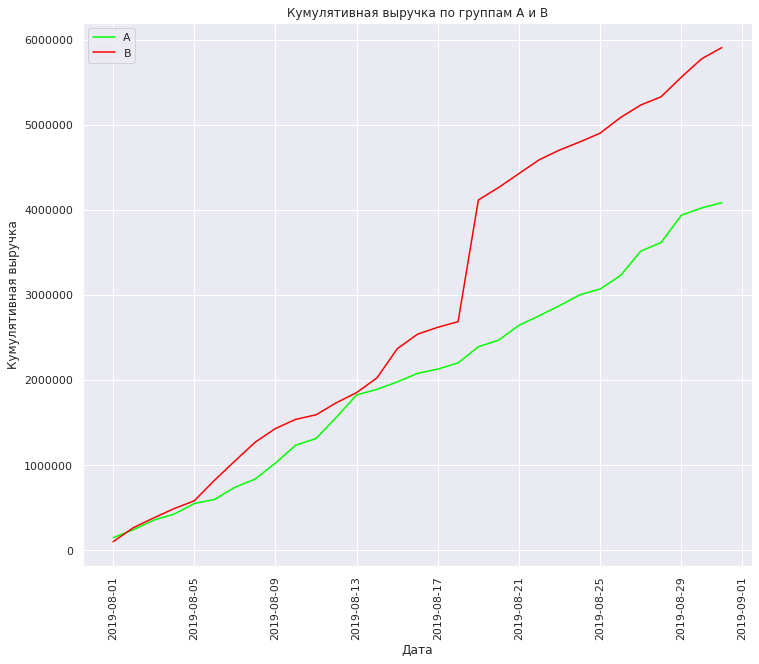

In [21]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='lime')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color='red')
plt.legend() 
plt.title("Кумулятивная выручка по группам А и В")
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=90)
plt.show()

Выручка увеличивается в течение всего теста. 

- На графике выручка **группы В** резко растет между 17 и 21 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 
- Выручка **группы А** растет довольно равномерно, без сильных всплесков

<font color='blue'>График кумулятивного среднего чека по группам</font>

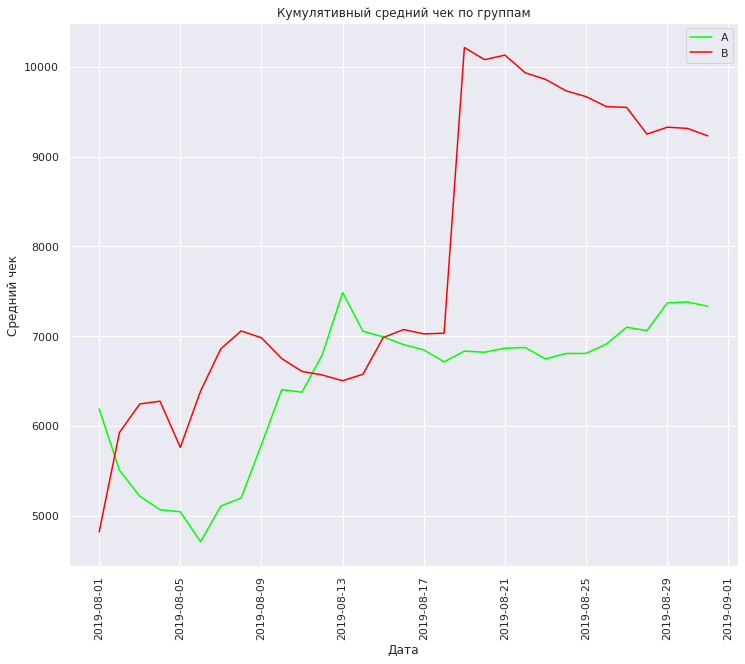

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color='lime')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color='red')
plt.legend() 
plt.title("Кумулятивный средний чек по группам")
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=90)
plt.show()

Средний чек становится равномерным к самому концу теста (примерно к 29 августа). Есть резкий всплекс по среднему чеку в **группе В** после 17 августа. Возможно, в этот период стало больше заказов или заказы стали дороже.

<font color='blue'>График относительного изменения кумулятивного среднего чека группы B к группе A</font>

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

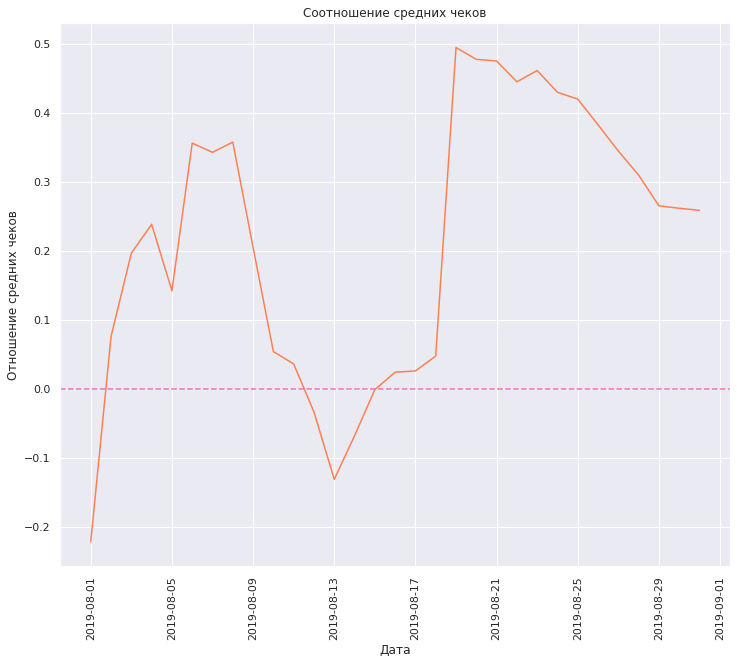

In [24]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color=random.choice(colors))
plt.axhline(y=0, color=random.choice(colors), linestyle='--') 
plt.title("Соотношение средних чеков")
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.xticks(rotation=90)
plt.show()

В нескольких точках есть резкие спады и скачки средних чеков. После 17 августа средний чек **группы В** стал почти на 50% выше среднего чека **группы А**. Возможно, это влияние размера заказов "аномальные заказы". 

На графике видно, что результаты **группы В**, хоть и начали снижаться после 21 августа, но все равно, к концу тестового периода,остаются примерно на 25% лучше результатов **группы А**.

<font color='blue'>График кумулятивной конверсии по группам</font>

In [25]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


**Группа А**

In [26]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


**Группа В**

In [27]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


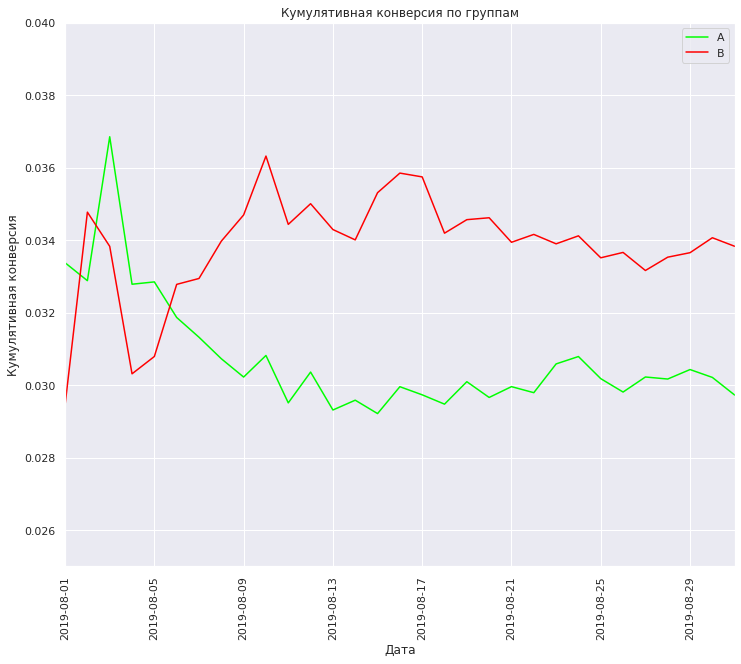

In [28]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='lime')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color='red')
plt.title("Кумулятивная конверсия по группам")
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.04]) 
plt.xticks(rotation=90)
plt.legend()
plt.show()

Получается симметричный график конверсий, до 5 августа группы колебались около одного значения, затем конверсия группы В начала рост и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

<font color='blue'>График относительного изменения кумулятивной конверсии группы B к группе A</font>

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head(5)

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


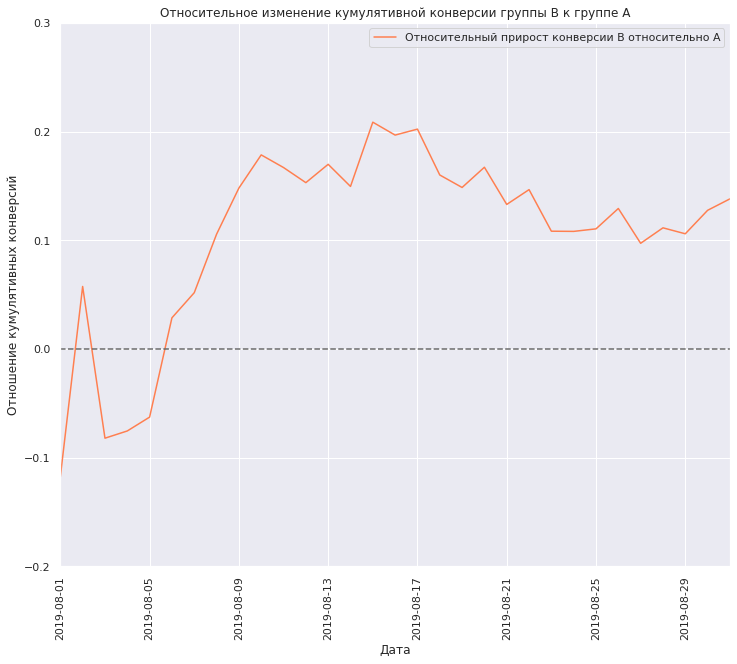

In [30]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии B относительно A", color=random.choice(colors))
plt.legend()
plt.axhline(y=0, color=random.choice(colors), linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3]) 
plt.title("Относительное изменение кумулятивной конверсии группы B к группе A")
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивных конверсий')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Конверсия группы В имеет волнообразный характер, достигает пиков прироста в 20% относительно группы А в первой половине августа, потом колебалась вверх-вниз и зафиксировалась к концу месяца примерно на уровне 10%. Можно говорить о том, что результаты группы В лучше результатов группы А.

<font color='blue'>Точечный график количества заказов по пользователям</font>

In [31]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


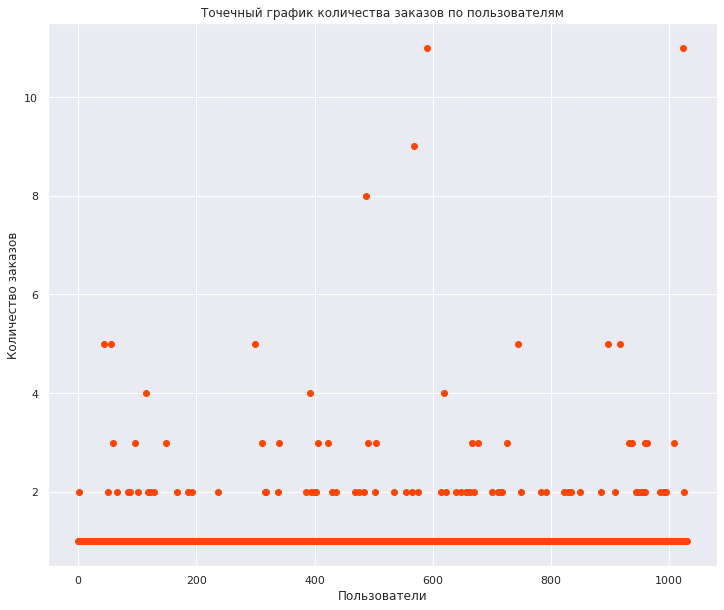

In [32]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], color=random.choice(colors)) 
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Мало пользователей, которые сделали больше 2 заказов. Оценить аномалия это или нет, можно если рассчитать выборочные перцентили.

<font color='blue'>95-й и 99-й перцентили количества заказов на пользователя</font>

In [33]:
display(np.percentile(ordersByUsers['orders'], [ 95, 99]))

array([2., 4.])

Не более 5% пользователей оформляли больше, чем 2 заказа. 

1% пользователей заказывал более 4 раз.

2 заказа на одного пользователя - нижняя граница числа заказов. По ней отрежу аномальных пользователей.

<font color='blue'>Точечный график стоимостей заказов</font>

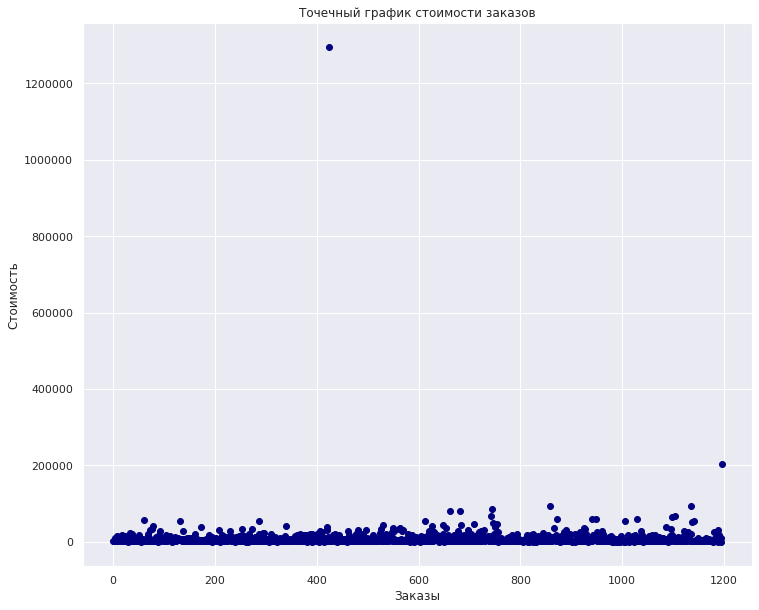

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color=random.choice(colors)) 
plt.title("Точечный график стоимости заказов")
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.show()

Очень мало заказов дороже 20 000 (только 2 явных выброса). Возьму 19 000 как границу для аномальных заказов, так как в эту сумму укладывается большая часть совершенных заказов.

<font color='blue'>95-й и 99-й перцентили стоимости заказов</font>

In [35]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233,2. 28 000 - граница для определения аномальных заказов.

<font color='blue'>Статистическая значимость различий в конверсии между группами по «сырым» данным</font>

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head(5)

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [37]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head(5)

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [38]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [39]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head(5)

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [40]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head(5)

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [41]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head(5)

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [42]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head(5)

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [43]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head(5)

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [44]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Описание данных в таблице data:

 - ordersPerDateA — количество заказов в выбранную дату в группе A;
 - revenuePerDateA — суммарная выручка в выбранную дату в группе A;
 - ordersPerDateB — количество заказов в выбранную дату в группе B;
 - revenuePerDateB — суммарная выручка в выбранную дату в группе B;
 - ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
 - revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
 - ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
 - revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
 - visitorsPerDateA — количество пользователей в выбранную дату в группе A;
 - visitorsPerDateB — количество пользователей в выбранную дату в группе B;
 - visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
 - visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Статистическая значимость различия в конверсии между группами.

Создам переменные ordersByUsersA и ordersByUsersB со столбцами 'userId', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов.

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head(5)

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [46]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersB.head(5)

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Создам переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это необходимо, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменные должны состоять из двух частей: 
 - список с количеством заказов для каждого из пользователей,
 - нули для пользователей, которые ничего не заказывали.

In [47]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [48]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [49]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [50]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Нахожу конверсию. 

В sampleA сохранена выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, необходимо поделить сумму заказов на число пользователей — найду среднее в выборке sampleA методом mean(). Аналогично применю к  конверсии группы B: sampleB.mean()

In [51]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [52]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Нулевая гипотеза (Н0)**: конверсия в группе В равна конверсии в группе А. 

**Альтернативная гипотеза (Н1)**: конверсия в группе В не равна конверсии в группе А.

**Нулевая гипотеза (Н0)** - внесение изменений не изменило конверсию (различие конверсий не является статистически значимым).

**Альтернативная гипотеза (Н1)** - внесение изменений изменило конверсию (разница статистически значима).

In [53]:
alpha = 0.05 

results = st.mannwhitneyu(sampleA, sampleB, alternative='two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима


In [54]:
display("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

'0.008'

In [55]:
display("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'0.138'

0.008 меньше 0.05 - Нулевая гипотеза **отвергается** - в конверсии между группами есть статистически значимые различия. Прирост конверсии группы В к группе А равен 13,8%. 

Вывод: по «сырым» данным различия в конверсии групп A и B есть.

<font color='blue'>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</font>

Для рассчета статистической значимости различий в среднем чеке между сегментами, передам критерию mannwhitneyu() данные о выручке с заказов, и найду относительные различия в среднем чеке между группами.

 - **Нулевая гипотеза (Н0)**: средний чек в группе В равен среднему чеку в группе А,
 - **Альтернативная гипотеза (Н1)**: средний чек в группе В не равен среднему чеку в группе А.

**Нулевая гипотеза (Н0)** - внесение изменений не изменило средний чек (различие средних чеков не является статистически значимым). 

**Альтернативная гипотеза (Н1)** - внесение изменений изменило средний чек (разница статистически значима).

In [56]:
alpha = 0.05 

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], 
                          alternative='two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [57]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

'0.365'

In [58]:
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.259'

p-value (0,365) больше 0,05 - статистически значимых различий в среднем чеке между группами нет. Относительное различие среднего чека между группами всего 2,5%. По «сырым» данным различий в среднем чеке групп A и B нет. Надо проанализировать аномалии.

<font color='blue'>Статистическая значимость различий в конверсии между группами по «очищенным» данным</font>

95-й и 99-й перцентили средних чеков равны 28 000 и 58 233. 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. Приму за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 19 000 рублей. Сделаю срезы пользователей с числом заказов больше 3 — *usersWithManyOrders* и пользователей, совершивших заказы дороже 19 000 — *usersWithExpensiveOrders*. Объединю их в таблице *abnormalUsers*. Методом shape() выясню, сколько всего аномальных пользователей.

In [59]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 19000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))

568     113298937
1099    148427295
461     154576532
18      199603092
928     204675465
dtype: int64

In [60]:
display(abnormalUsers.shape)

(105,)

Всего **105 аномальных пользователей**

Необходимо посмотреть, как их действия повлияли на результаты теста. 

Посчитаюю статистическую значимость различий в конверсии между группами теста по очищенным данным. 

Выборка количества заказов по пользователям по группам теста:

In [61]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [62]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Нулевая гипотеза (Н0)** - внесение изменений не изменило конверсию по "очищенным" данным (различие конверсий не является статистически значимой).

**Альтернативная гипотеза (Н1)** - внесение коррективов изменило конверсию по "очищенным" данным (разница статистически значима).

In [63]:
alpha = 0.05

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.029311577747636944
Отвергаем нулевую гипотезу: разница статистически значима


Статистический критерий **Манна-Уитни** к полученным выборкам:

In [64]:
display('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

'0.015'

p-value увеличился по сравнению с p-value "сырых" данных; но 0,015 меньше 0.05 - нулевую гипотезу **отвергаю** - в конверсии между группами есть статистически значимые различия

In [65]:
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'0.149'

Прирост конверсии группы В к группе А равен 14,9%. 

Вывод: по «очищенным» данным различия в конверсии групп A и B есть. Сегмент В значительно *лучше* сегмента А.

По "сырым" данным были показатели 0,008 и 0,138, соответственно. В целом, результаты по конверсии по "очищенным" данным выше, чем по "сырым", но вывод мы получили остается таким же - есть статистические различия в конверсиях между группами.

<font color='blue'>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</font>

In [66]:
display(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

'0.465'

In [67]:
display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'-0.029'

P-value увеличился (в "сырых" данных был 0,365), но он тоже больше 0,05 - статистически значимых различий в среднем чеке между группами нет. Но средний чек группы B получился ниже среднего чека группы A. Общий вывод по результатам теста не изменился.

**Нулевая гипотеза (Н0)** - внесение коррективов не изменило средний чек "очищенных" данных (различие средних чеков не является статистически значимым).

**Альтернативная гипотеза (Н1)** - внесение коррективов изменило средний чек "очищенных" данных (разница статистически значима).

<font color='red'>Вывод:</font>

Согласно сравнению конверсии и среднего чека по "сырым" и "очищенным" данным, могу сделать следующие выводы:
 - Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
 - По графику относительного изменения кумулятивной конверсии группы B к группе A видно, что конверсия группы В имеет волнообразный характер, достигает пиков прироста в 20% относительно группы А в первой половине августа, потом колебалась вверх-вниз и зафиксировалась к концу месяца примерно на уровне 10%. Это позволяет говорить о том, что результаты группы В лучше результатов группы А;
 - По графику относительного изменения кумулятивного среднего чека группы B к группе A видно, что в нескольких точках есть резкие спады и скачки средних чеков. После 17 августа средний чек группы В стал почти на 50% выше среднего чека группы А. Возможно, это влияние размера заказов "аномальные заказы". На графике видно, что результаты группы В, хоть и начали снижаться после 21 августа, но все равно, к концу тестового периода,остаются примерно на 25% лучше результатов группы А.

# <a id="vyvod"></a><font style="background-color: Cyan; color=black">Вывод по результату исследования</font> #

На основании выводов, приведенных выше, тест можно признать **успешным**. 

Победа **группы В**. 

Тест **останавливаем**